In [2]:
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\vince\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\vince\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import numpy as np

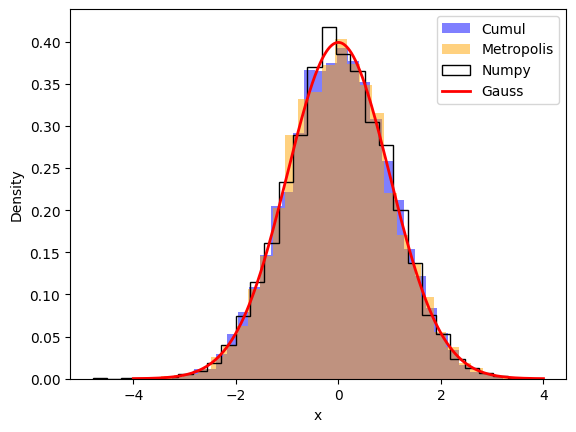

: 

In [ ]:
def gauss(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def random_normal(mu, sigma):
    s = 0; N = 5
    for _ in range(N): s += np.random.random()*2-1
    return mu + sigma * s / np.sqrt(N/3)

# def random_in_distrib_rejection(dist, a, b):
#     while True:
#         x = np.random.random() * (b - a) + a
#         y = np.random.random()
#         if y < dist(x):
#             return x

def random_in_distrib_metropolis(dist, a, b):
    x = np.random.random() * (b - a) + a
    N = 10
    for _ in range(N):
        x2 = np.random.random() * (b - a) + a
        if np.random.random() < dist(x2) / dist(x):
            x = x2
    return x

samples = 10000

data = []
for _ in range(samples):
    data.append(random_normal(0, 1))

# data_rejection = []
# for _ in range(samples):
#     data_rejection.append(random_in_distrib_rejection(lambda x: gauss(x, 0, 1), -4, 4))

data_metro = []
for _ in range(samples):
    data_metro.append(random_in_distrib_metropolis(lambda x: gauss(x, 0, 1), -4, 4))

plt.hist(data, bins=30, density=True, label='Cumul', alpha=0.5, color='blue')
plt.hist(data_metro, bins=30, density=True, label='Metropolis', alpha=0.5, color='orange')
plt.hist(np.random.normal(0, 1, samples), bins=30, density=True, label='Numpy', histtype='step', color='black')
x = np.linspace(-4, 4, 1000)
plt.plot(x, gauss(x, 0, 1), color='red', lw=2, label='Gauss')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.show()